In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import numpy as np
sns.set_style("darkgrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
l2_trials = pd.read_csv("/content/drive/MyDrive/AML project/modelli/modelli salvati/risultati_opt_l2.csv")
dropout_trials = pd.read_csv("/content/drive/MyDrive/AML project/modelli/modelli salvati/dropout.csv")
dropout_trials = dropout_trials.drop(index = 0)
dropout_trials = dropout_trials.reset_index()

In [4]:
def maximizer(data):

  best_data = []
  
  best_data.append(data[1]) #da rimettere a zero

  smaller = data[1] #da rimettere a zero

  
  for i in range(len(data)-1):
    
    if data[i+1] < smaller : 

      best_data.append(data[i+1])

      smaller = data[i+1]

    else:

      best_data.append(smaller)

  
  return best_data



l2_trials['best_value'] = maximizer(l2_trials['value'])
dropout_trials['best_value'] = maximizer(dropout_trials['value'])

In [5]:
dropout_trials.head()

,index,number,value,datetime_start,datetime_complete,duration,params_#hidden,params_dense1,params_dense2,params_dense3,params_dense4,params_dropout,params_lr,state,best_value
0,1,1,0.289188,2021-01-02 15:50:06.720583,2021-01-02 15:56:57.705768,0 days 00:06:50.985185,3.0,224.0,112.0,48.0,NaN,0.320526,0.000284,COMPLETE,0.296888
1,2,2,0.296888,2021-01-02 15:56:57.811408,2021-01-02 16:01:55.431493,0 days 00:04:57.620085,4.0,176.0,64.0,32.0,48.0,0.331878,0.000664,COMPLETE,0.296888
2,3,3,0.398048,2021-01-02 16:01:55.521343,2021-01-02 16:05:26.242849,0 days 00:03:30.721506,4.0,160.0,16.0,112.0,16.0,0.275429,0.002871,COMPLETE,0.296888
3,4,4,0.480134,2021-01-02 16:05:26.338641,2021-01-02 16:11:33.603772,0 days 00:06:07.265131,4.0,80.0,16.0,16.0,16.0,0.276103,0.001835,COMPLETE,0.296888
4,5,5,0.296384,2021-01-02 16:11:33.691370,2021-01-02 16:15:39.098381,0 days 00:04:05.407011,3.0,128.0,48.0,80.0,NaN,0.219112,0.000717,COMPLETE,0.296384


In [6]:
l2_trials.head()

,number,value,datetime_start,datetime_complete,duration,params_#hidden,params_dense1,params_dense2,params_dense3,params_dense4,params_lambda,params_lr,state,best_value
0,0,0.339813,2021-01-02 15:54:26.009347,2021-01-02 16:01:48.539728,0 days 00:07:22.530381,3,224,112,48,NaN,0.004508,0.000284,COMPLETE,0.352465
1,1,0.352465,2021-01-02 16:01:48.605387,2021-01-02 16:08:39.457340,0 days 00:06:50.851953,4,176,64,32,48.0,0.005484,0.000664,COMPLETE,0.352465
2,2,0.321881,2021-01-02 16:08:39.516914,2021-01-02 16:12:44.333247,0 days 00:04:04.816333,4,160,16,112,16.0,0.002069,0.002871,COMPLETE,0.321881
3,3,0.319897,2021-01-02 16:12:44.393327,2021-01-02 16:19:49.279613,0 days 00:07:04.886286,4,80,16,16,16.0,0.002093,0.001835,COMPLETE,0.319897
4,4,0.301498,2021-01-02 16:19:49.346306,2021-01-02 16:24:47.409268,0 days 00:04:58.062962,3,128,48,80,NaN,0.000782,0.000717,COMPLETE,0.301498


In [7]:
### plot loss train vs loss val

perf_no_opt_l1 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_l1.csv")
perf_opt_l1 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_l1.csv")

perf_no_opt_l2 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_l2.csv")
perf_opt_l2 = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_l2.csv")

perf_no_opt_dropout = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_no_opt_dropout.csv")
perf_opt_dropout = pd.read_csv(r"/content/drive/MyDrive/AML project/modelli/modelli salvati/perf_opt_dropout.csv")

In [8]:
model_l2_opt =keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_opt_l2.h5")
model_l2_no_opt =keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_no_opt_l2.h5")

In [9]:
model_l1_opt = keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_opt_l1.h5")
model_l1_no_opt = keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_no_opt_l1.h5")

In [10]:
model_dropout_opt = keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_opt_dropout.h5")
model_dropout_no_opt = keras.models.load_model("/content/drive/MyDrive/AML project/modelli/modelli salvati/model_no_opt_dropout.h5")

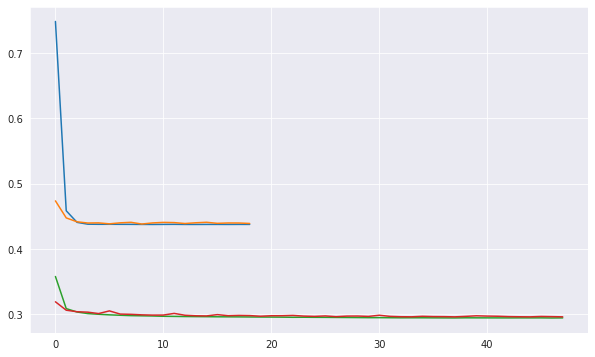

In [11]:
plt.figure(figsize = (10, 6))

plt.plot(perf_no_opt_l1['loss'])
plt.plot(perf_no_opt_l1['val_loss'])
plt.plot(perf_opt_l1['loss'])
plt.plot(perf_opt_l1['val_loss'])

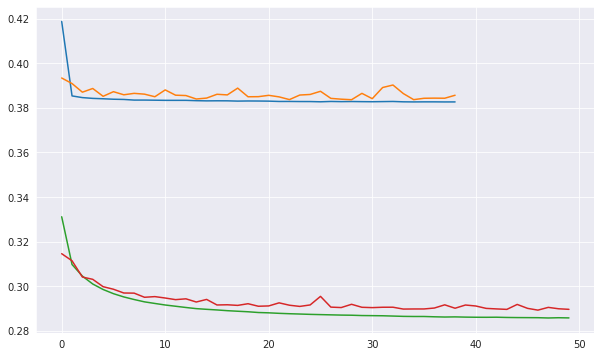

In [12]:
plt.figure(figsize = (10, 6))

plt.plot(perf_no_opt_l2['loss'])
plt.plot(perf_no_opt_l2['val_loss'])

plt.plot(perf_opt_l2['loss'])
plt.plot(perf_opt_l2['val_loss'])

In [13]:
train = pd.read_csv("/content/drive/MyDrive/AML project/train_manipulated.csv")

In [14]:
## preparazione train e validation set

y_train = train['trip_duration'].values.reshape(-1, 1)

X_train = train.drop(columns = ['trip_duration'])

#si separano le dummies dalle quantitative

X_train_to_stand = X_train[['passenger_count', 'distance']]

X_train_not_stand = X_train.drop(columns = ['passenger_count', 'distance']).values

In [15]:
X_train.shape

(1440433, 41)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_to_stand)
y_train = scaler.fit(y_train).fit_transform(y_train)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train = np.concatenate((X_train, X_train_not_stand), axis = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25,
                                                  random_state = 1234)

In [19]:
model_l1_no_opt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 224)               9408      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_l1_opt.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 240)               10080     
_________________________________________________________________
dense_9 (Dense)              (None, 16)                3856      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 16,241
Trainable params: 16,241
Non-trainable params: 0
_________________________________________________________________


In [21]:
y_pred_l1 = model_l1_opt.predict(X_val)
y_pred_no_opt_l1 = model_l1_no_opt.predict(X_val)

In [22]:
y_pred_l1_train = model_l1_opt.predict(X_train)
y_pred_no_opt_l1_train = model_l1_no_opt.predict(X_train)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mse_l1_val = mean_squared_error(y_val, y_pred_l1, squared=False)
mse_l1_train = mean_squared_error(y_train, y_pred_l1_train, squared=False)

In [25]:
mse_l1_val

1.4807835074895794

In [26]:
mse_l1_val_no_opt = mean_squared_error(y_val, y_pred_no_opt_l1, squared=False)

In [27]:
mse_l1_val_no_opt

1.518354671465914

In [28]:
model_l2_no_opt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               9408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               28800     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [29]:
model_l2_opt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 160)               6720      
_________________________________________________________________
dense_5 (Dense)              (None, 112)               18032     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                7232      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 36,209
Trainable params: 36,209
Non-trainable params: 0
_________________________________________________________________


In [30]:
y_pred_l2 = model_l2_opt.predict(X_val)
y_pred_no_opt_l2 = model_l2_no_opt.predict(X_val)

In [31]:
y_pred_l2_train = model_l2_opt.predict(X_train)
y_pred_no_opt_l2_train = model_l2_no_opt.predict(X_train)

In [32]:
mse_l2_val = mean_squared_error(y_val, y_pred_l1, squared=False)
mse_l2_train = mean_squared_error(y_train, y_pred_l1_train, squared=False)

In [33]:
mse_l2_val_no_opt = mean_squared_error(y_val, y_pred_no_opt_l2, squared=False)

In [34]:
mse_l2_val_no_opt

0.5638042710793362

In [35]:
mse_l2_val

1.4807835074895794

In [36]:
model_dropout_no_opt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 224)               9408      
_________________________________________________________________
dropout (Dropout)            (None, 224)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               28800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [37]:
model_dropout_opt.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 224)               9408      
_________________________________________________________________
dropout_3 (Dropout)          (None, 224)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 112)               25200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 112)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 48)                5424      
_________________________________________________________________
dropout_5 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [38]:
y_pred_dropout = model_dropout_opt.predict(X_val)
y_pred_no_opt_dropout = model_dropout_no_opt.predict(X_val)

y_pred_dropout_train = model_dropout_opt.predict(X_train)
y_pred_no_opt_dropout_train = model_dropout_no_opt.predict(X_train)

In [39]:
mse_dropout_val = mean_squared_error(y_val, y_pred_dropout, squared=False)
mse_dropout_train = mean_squared_error(y_train, y_pred_dropout_train, squared=False)

In [40]:
mse_dropout_val_no_opt = mean_squared_error(y_val, y_pred_no_opt_dropout, squared=False)

In [41]:
mse_dropout_val_no_opt

0.5385975812626607

In [42]:
mse_dropout_val

0.535252920236478

In [55]:
data = {'num_parameters' : [46.529, 16.241, 46.529, 36.209, 46.529, 40.081],
        'mse': [1.518, 1.481, 0.564, 1.481, 0.539, 0.535],
        'model': ['l1_no_opt','l1_opt', 'l2_no_opt', 'l2_opt','dropout_no_opt','dropout_opt']}

In [56]:
df = pd.DataFrame(data) 
df

,num_parameters,mse,model
0,46.529,1.518,l1_no_opt
1,16.241,1.481,l1_opt
2,46.529,0.564,l2_no_opt
3,36.209,1.481,l2_opt
4,46.529,0.539,dropout_no_opt
5,40.081,0.535,dropout_opt


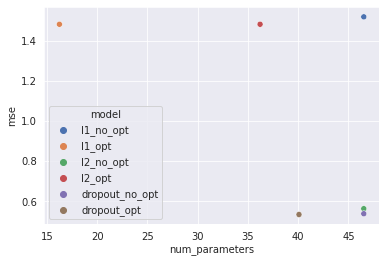

In [58]:
sns.scatterplot(data=df, x="num_parameters", y="mse", palette="deep", hue="model")

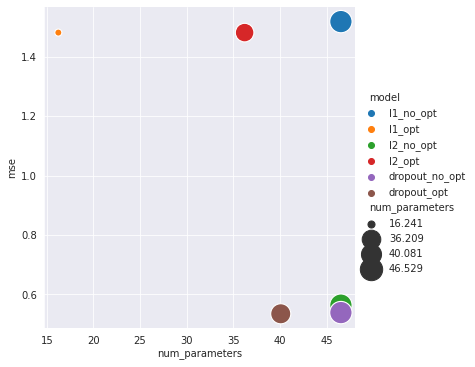

In [76]:
sns.relplot(
    data=df, x="num_parameters", y="mse",
    hue="model", size="num_parameters",
    sizes=(50, 500), kind="scatter",
    legend="full"
)

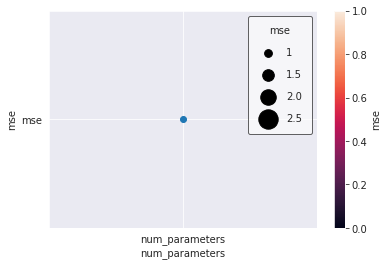

In [88]:
plt.scatter("num_parameters", "mse", s=None)
ax = plt.gca()
plt.colorbar(label="mse")
plt.xlabel("num_parameters")
plt.ylabel("mse")

#make a legend:
pws = [0.5, 1, 1.5, 2., 2.5]
for pw in pws:
    plt.scatter([], [], s=(pw**2)*60, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[1:], l[1:], labelspacing=1.2, title="mse", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w")

plt.show()